# 1. Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Loading the Dataset

In [3]:
df = pd.read_csv("./FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# 3. Exploratory Data Analysis

In [4]:
featured_data = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
featured_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


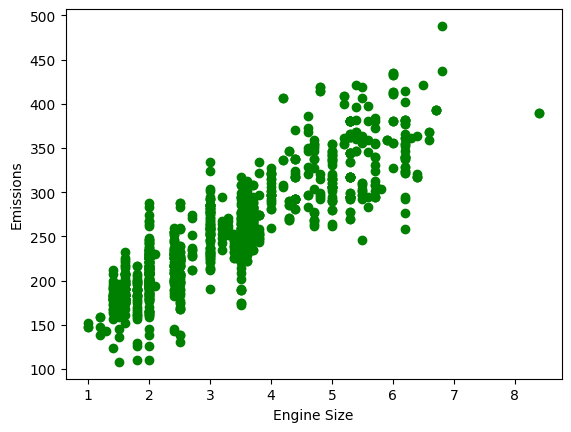

In [6]:
plt.scatter(x = featured_data.ENGINESIZE, y = featured_data.CO2EMISSIONS, color = "green")

plt.xlabel("Engine Size")
plt.ylabel("Emissions")

plt.show()

# 4. Splitting the Data

In [8]:
from sklearn.model_selection import train_test_split

x = featured_data.drop(["CO2EMISSIONS"], axis = 1)
y = featured_data["CO2EMISSIONS"]


x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# 5. Modelling

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree = 2)

train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[  1.  ,   1.4 ,   4.  , ...,  16.  ,  31.2 ,  60.84],
       [  1.  ,   4.4 ,   8.  , ...,  64.  , 101.6 , 161.29],
       [  1.  ,   3.  ,   6.  , ...,  36.  ,  59.4 ,  98.01],
       ...,
       [  1.  ,   4.4 ,   8.  , ...,  64.  , 110.4 , 190.44],
       [  1.  ,   1.8 ,   4.  , ...,  16.  ,  34.4 ,  73.96],
       [  1.  ,   5.6 ,   8.  , ...,  64.  , 138.4 , 299.29]])

In [10]:
clf = linear_model.LinearRegression()

train_y = clf.fit(train_x_poly, y_train)

print("Coefficient: ", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficient:  [  0.          -0.08302981 -10.95302447  31.79788221   2.96209678
  -9.5526584    3.7284399    2.26618871   1.74898048  -1.70440998]
Intercept:  1.076314201391881


# 6. Evaluation

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_preds = clf.predict(x_test)

c:\Users\Zaki Hamdard\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 10 features as input.